# Libraries needed

In [1]:
import numpy as np
import tensorflow as tf
from tqdm import tqdm,tqdm_notebook
from tensorflow.python import keras
from numpy.linalg import norm
import pickle
import os
import time
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import cv2
import imghdr

# Resolutional networks ( a simpler version of CNN) 

In [2]:
model= ResNet50(weights='imagenet',include_top=False,input_shape=(224, 224, 3))
def extract_features(img_path, model):
    input_shape = (224, 224, 3)
    img=image.load_img(img_path,target_size=(input_shape[0],input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features

In [3]:
'''This line extracts the features of a sample image'''
features = extract_features('C:\\Users\\anush\\Downloads\\monkeys\\n0018.jpg', model)
print(len(features))
features

100352


array([0.        , 0.        , 0.        , ..., 0.01051831, 0.        ,
       0.        ], dtype=float32)

In [4]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']
def get_file_list(root_dir):
    file_list = []
    counter = 1
    '''Walks through the root_dir string and finds out all the files present under the directory'''
    for root, directories, filenames in os.walk(root_dir):
         for filename in filenames:
            '''The jpg files are segregated based on the if loop executed below'''    
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))
                counter += 1
    return file_list

In [5]:
root_dir = 'C:\\Users\\anush\\Downloads\\monkeys'
filenames = sorted(get_file_list(root_dir))

In [6]:
filenames


['C:\\Users\\anush\\Downloads\\monkeys\\n0018.jpg',
 'C:\\Users\\anush\\Downloads\\monkeys\\n0019.jpg',
 'C:\\Users\\anush\\Downloads\\monkeys\\n0020.jpg',
 'C:\\Users\\anush\\Downloads\\monkeys\\n0021.jpg',
 'C:\\Users\\anush\\Downloads\\monkeys\\n0022.jpg',
 'C:\\Users\\anush\\Downloads\\monkeys\\n0023.jpg',
 'C:\\Users\\anush\\Downloads\\monkeys\\n0024.jpg',
 'C:\\Users\\anush\\Downloads\\monkeys\\n0025.jpg',
 'C:\\Users\\anush\\Downloads\\monkeys\\n0026.jpg',
 'C:\\Users\\anush\\Downloads\\monkeys\\n0027.jpg',
 'C:\\Users\\anush\\Downloads\\monkeys\\n0028.jpg',
 'C:\\Users\\anush\\Downloads\\monkeys\\n0029.jpg',
 'C:\\Users\\anush\\Downloads\\monkeys\\n0030.jpg',
 'C:\\Users\\anush\\Downloads\\monkeys\\n0031.jpg',
 'C:\\Users\\anush\\Downloads\\monkeys\\n0032.jpg',
 'C:\\Users\\anush\\Downloads\\monkeys\\n0033.jpg',
 'C:\\Users\\anush\\Downloads\\monkeys\\n0034.jpg',
 'C:\\Users\\anush\\Downloads\\monkeys\\n0035.jpg',
 'C:\\Users\\anush\\Downloads\\monkeys\\n0036.jpg',
 'C:\\Users\

In [7]:
feature_list = []
'''tqm_notebook is a graphical way to show the level of completion by a progress bar'''
for i in tqdm_notebook(range(len(filenames))):
    feature_list.append(extract_features(filenames[i], model))

<ipython-input-7-91f5caa2d9ec>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(filenames))):


In [8]:
'''The file_names and the features are stored in a pickle file in order to avoid retreival of data every time the program is executed'''
pickle.dump(feature_list, open('C:\\Users\\anush\\Downloads\\features-monkey.pickle', 'wb'))
pickle.dump(filenames, open('C:\\Users\\anush\\Downloads\\filenames-monkey.pickle','wb'))

In [9]:
filenames = pickle.load(open('C:\\Users\\anush\\Downloads\\filenames-monkey.pickle', 'rb'))
feature_list = pickle.load(open('C:\\Users\\anush\\Downloads\\features-monkey.pickle', 'rb'))

# KNN Algorithm

In [10]:
'''KNN algaorithm is used to determine the closest features of the given image'''
x=int(input())
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=11, algorithm='brute',
metric='euclidean').fit(feature_list)
distances, indices = neighbors.kneighbors([feature_list[x]])
indices.astype(int)


12


array([[  12,   56,   59,   45,   16,   72,   23,   65, 1088,   53,   20]])

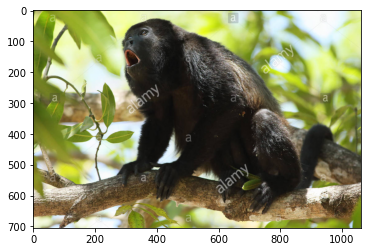

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline       
plt.imshow(mpimg.imread(filenames[x]))


In [12]:
for i in range(11):
    print(distances[0][i])

0.0
0.47885093
1.0167856
1.0192482
1.0326409
1.040315
1.040315
1.0449033
1.0595927
1.0647223
1.0658506


distance= 0.47885093


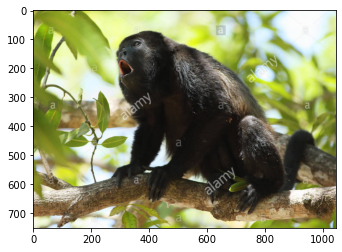

distance= 1.0167856


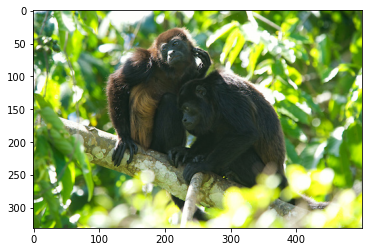

distance= 1.0192482


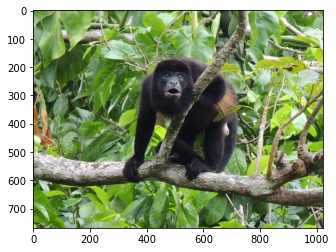

distance= 1.0326409


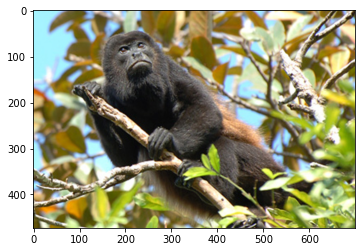

distance= 1.040315


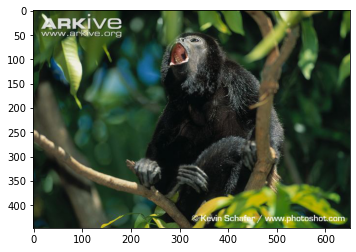

distance= 1.040315


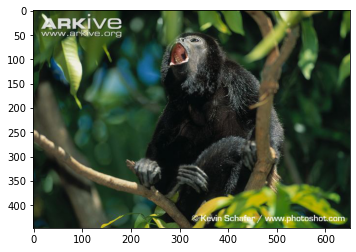

distance= 1.0449033


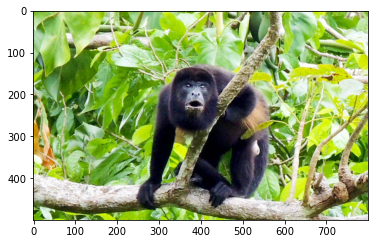

distance= 1.0595927


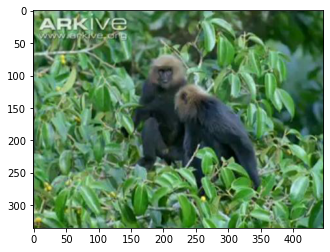

distance= 1.0647223


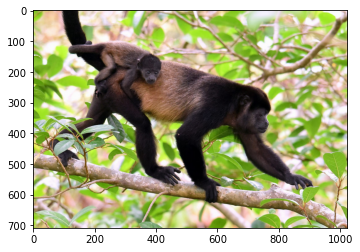

distance= 1.0658506


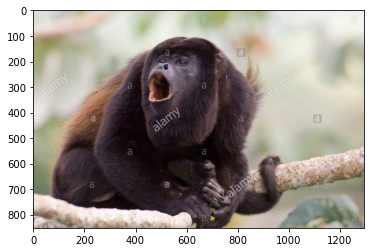

In [14]:
'''Determines the 10 images which are similar to the original image in desceding order'''
for i in range(1,11):
    final_image=mpimg.imread(filenames[indices[0][i]])
    print("distance=",distances[0][i])
    plt.imshow(final_image)
    plt.show()    